# Summary of analysis

In [5]:
using StatsPlots;
using Plots;
using Distributions;

In [3]:
function category_groupbar(data, ctg, nam; xlabel = "", ylabel = "", title = "", subplot = 1)

    StatsPlots.groupedbar!(nam, data, xlabel = xlabel, labels = false,
        ylabel = ylabel, title =title, bar_width = 0.5, lw = 0, framestyle = :box, 
        subplot = subplot, legendtitlefontsize = 4, yaxis = false)
    
end

category_groupbar (generic function with 1 method)

In [8]:
# to get Pressor Dose from action
a2pressor = [(0, 0.04), (0.04, 0.10), (0.10, 0.15), (0.15, 0.20), (0.20, Float64(Inf))]
# to get Fluid Dose from action
a2fluid   = [(0, 16.0), (16.0, 43.23), (43.23, 88.71), (88.71, 223.96), (223.96, Float64(Inf))]



function act2meds(a)
    pressor = div(a + 4, 5)
    fluid   = (a - 1) % 5 + 1
    return pressor, fluid
end

act2meds (generic function with 1 method)

## Deep SARSA

In [25]:
distr_deceased = (
                  # Physisian
                  [[6387.0, 1806.0, 1131.0, 541.0, 3398.0], 
                   [4110.0, 4753.0, 1328.0, 905.0, 2167.0]], 
                  # AI 
                  [[664.0, 2767.0, 4607.0, 2795.0, 2430.0], 
                   [1557.0, 923.0, 2666.0, 4647.0, 3470.0]])

([[6387.0, 1806.0, 1131.0, 541.0, 3398.0], [4110.0, 4753.0, 1328.0, 905.0, 2167.0]], [[664.0, 2767.0, 4607.0, 2795.0, 2430.0], [1557.0, 923.0, 2666.0, 4647.0, 3470.0]])

In [26]:
distr_survived = (
                   # Physisian
                   [[11553.0, 3346.0, 1520.0, 700.0, 2787.0], 
                    [6841.0, 6620.0, 1350.0, 1404.0, 3691.0]], 
                   # AI
                   [[2319.0, 2720.0, 5547.0, 6136.0, 3184.0], 
                    [4709.0, 1595.0, 4085.0, 5473.0, 4044.0]])

([[11553.0, 3346.0, 1520.0, 700.0, 2787.0], [6841.0, 6620.0, 1350.0, 1404.0, 3691.0]], [[2319.0, 2720.0, 5547.0, 6136.0, 3184.0], [4709.0, 1595.0, 4085.0, 5473.0, 4044.0]])

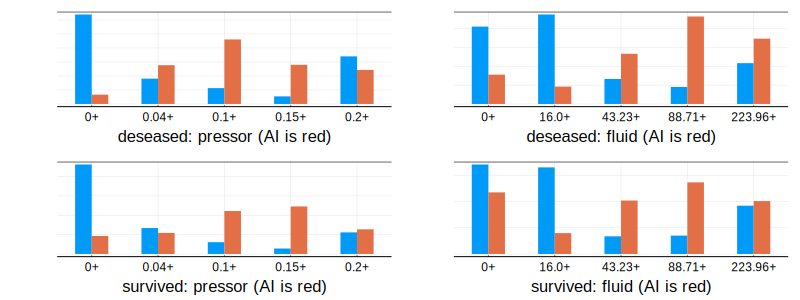

In [46]:
dcli = distr_deceased[1]
dai  = distr_deceased[2]
scli = distr_survived[1]
sai  = distr_survived[2]

ctg         = repeat(["Ph", "AI"], inner = 5)
nam_pressor = repeat(["$(v[1])+" for v in a2pressor], outer = 2)
nam_fluid   = repeat(["$(v[1])+" for v in a2fluid], outer = 2)

plot(layout=(2,2), size = (800, 300))

category_groupbar([dcli[1] dai[1]], ctg, nam_pressor, xlabel = "deseased: pressor (AI is red)", subplot = 1)
category_groupbar([dcli[2] dai[2]], ctg, nam_fluid, xlabel = "deseased: fluid (AI is red)", subplot = 2)

category_groupbar([scli[1] sai[1]], ctg, nam_pressor, xlabel = "survived: pressor (AI is red)", subplot = 3)
category_groupbar([scli[2] sai[2]], ctg, nam_fluid, xlabel = "survived: fluid (AI is red)", subplot = 4)

In [29]:
cli5044 = [7, 7, 7, 12, 17, 22, 22, 22, 17, 16, 16, 23, 23, 22, 22, 12, 6, 2, 2, 1, 2, 1]
ai5044  = [25, 17, 25, 25, 16, 9, 9, 9, 9, 9, 10, 9, 13, 9, 9, 10, 15, 20, 20, 9, 20, 6]
map5044 = [68, 60, 62.0, 67, 63.0, 57, 62.0, 60, 63.0, 66, 70, 62.0, 61, 53, 61, 70.0, 49, 53, 51, 51, 32.0, 75]


cli5025 = [12, 15, 20, 20, 15, 15, 15, 15, 14, 13, 13, 13, 13, 15, 15, 13, 13, 18, 23, 23, 23, 23, 23, 23, 23, 25, 25, 24, 23, 23, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 24, 25, 24, 23, 23, 25, 25, 23, 23, 23, 23, 23, 23, 23, 25, 1]
ai5025  = [9, 9, 9, 9, 9, 9, 9, 10, 10, 18, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 19, 9, 9, 9, 7, 10, 7, 9, 9, 9, 9, 9, 6]
map5025 = [89.0, 108.0, 75, 65, 99, 92, 101, 108, 96.0, 85.0, 73, 74, 80, 76, 73, 73, 67, 65, 67, 70, 66, 74, 73, 73, 74.0, 79, 84, 74, 83, 78, 77, 80, 73, 69, 75, 77, 85, 86, 90, 86, 79.0, 72, 76, 79, 69, 61.0, 74, 65, 70, 55.0, 80.0, 72.0, 74, 67, 60, 63.0, 60, 62.0, 59, 75]


cli5200 = [5, 5, 5, 2, 2, 2, 2, 1, 5, 10, 7, 7, 7, 7, 7, 7, 7, 10, 6, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 5, 5, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
ai5200  = [18, 18, 18, 18, 18, 16, 14, 14, 19, 16, 19, 25, 16, 17, 14, 14, 19, 20, 19, 14, 19, 14, 14, 19, 19, 19, 19, 19, 11, 11, 16, 17, 17, 17, 20, 16, 16, 16, 16, 16, 16, 16, 16, 16, 20, 18, 11, 11, 11, 11, 11, 1, 6, 18, 6, 6, 6, 6, 18, 6, 6, 6, 4, 1, 11, 11, 11, 1, 11, 11, 11, 11, 1]
map5200 = [92.0, 77, 88.0, 109.0, 55.0, 73, 82, 82, 71, 69.0, 71, 65.0, 71, 63.0, 75.0, 75, 74, 68.0, 77, 77, 8, 94, 96, 77, 88, 95, 92, 90, 92, 93, 85, 85, 91, 92, 99, 104, 107, 106, 107, 113, 114, 102, 97, 99, 108, 107, 106, 97, 102, 87, 91, 99, 100, 88, 81, 90, 92, 99, 92, 88, 96, 82, 77, 74.0, 91.0, 91, 70, 94.0, 85.0, 87.0, 87.0, 87.0, 75]


cli5300 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 6, 7, 7, 7, 7, 7, 12, 17, 17, 17, 17, 12, 12, 7, 10, 10, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
ai5300  = [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 15, 15, 15, 3, 17, 17, 17, 17, 17, 17, 17, 17, 17, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 14, 14, 14, 17, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 14, 14, 14, 11, 15, 14, 14, 14, 15]
map5300 = [75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 66, 66.0, 64, 60.0, 75, 85, 94, 59, 64.0, 64, 62, 68, 75, 62, 78.0, 65, 62, 93, 70, 79, 72, 85, 68.0, 73, 75, 81, 83, 74, 89, 86.0, 77, 69, 71, 73, 60, 67, 71, 84, 93, 70, 78, 91, 87, 90, 82, 83, 76, 92, 98, 98, 91, 104, 92, 75, 70, 75]
;

In [48]:
function get_meds(actions)
    return [act2meds(a)[1] for a in actions]
end
function get_fluid(actions)
    return [act2meds(a)[2] for a in actions]
end

c_med = get_meds(cli5044)
a_med = get_meds(ai5044)

c_flu = get_fluid(cli5044)
a_flu = get_fluid(ai5044)

map = map5044;


In [102]:
function draw_trajectory(c_med, a_med, c_flu, a_flu, map)
    plot(layout=(3,1), size = (900, 300))

    plot!([i for i=1:length(c_med)], c_med, legend = false, label = "Line 1", lw = 1, xaxis = false, yaxis = false, linetype = :bar, fillalpha = 0.6)
    plot!([i for i=1:length(c_med)], a_med, legend = false, label = "Line 2", lw = 1, xaxis = false, yaxis = false, linetype = :bar, fillalpha = 0.6)

    plot!([i for i=1:length(c_med)], c_flu, legend = false, label = "Line 1", lw = 1, xaxis = false, yaxis = false, linetype = :bar, fillalpha = 0.6, subplot = 2)
    plot!([i for i=1:length(c_med)], a_flu, legend = false, label = "Line 2", lw = 1, xaxis = false, yaxis = false, linetype = :bar, fillalpha = 0.6, subplot = 2)


    plot!([i for i=1:length(c_med)], map, legend = false, label = "Line 1", lw = 1, xaxis = false, yaxis = true, fillcolor = :orange, linetype = :bar, fillalpha = 0.9, subplot=3)
end


draw_trajectory (generic function with 1 method)

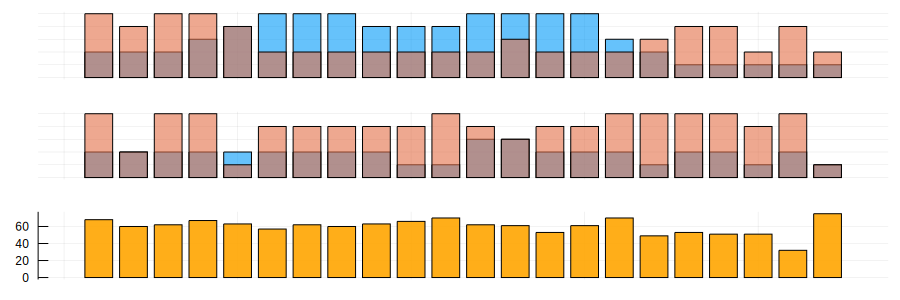

In [103]:
c_med = get_meds(cli5044)
a_med = get_meds(ai5044)
c_flu = get_fluid(cli5044)
a_flu = get_fluid(ai5044)
map = map5044;
draw_trajectory(c_med, a_med, c_flu, a_flu, map)

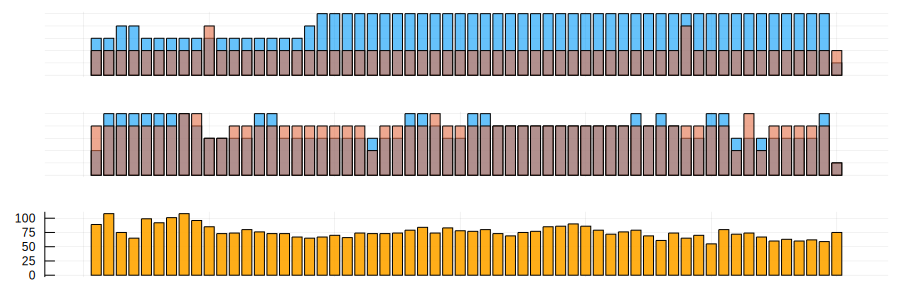

In [104]:
c_med = get_meds(cli5025)
a_med = get_meds(ai5025)
c_flu = get_fluid(cli5025)
a_flu = get_fluid(ai5025)
map = map5025;
draw_trajectory(c_med, a_med, c_flu, a_flu, map)

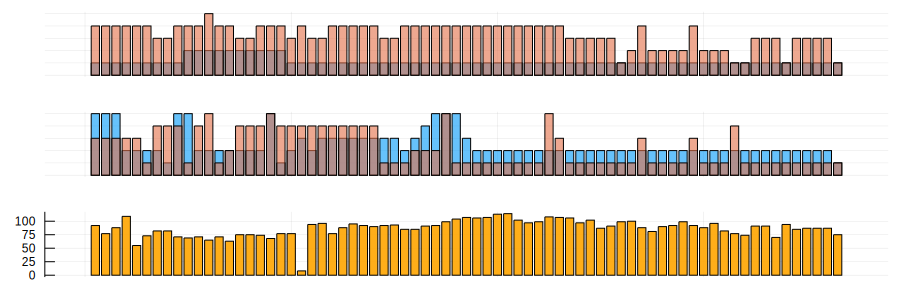

In [105]:
c_med = get_meds(cli5200)
a_med = get_meds(ai5200)
c_flu = get_fluid(cli5200)
a_flu = get_fluid(ai5200)
map = map5200;
draw_trajectory(c_med, a_med, c_flu, a_flu, map)

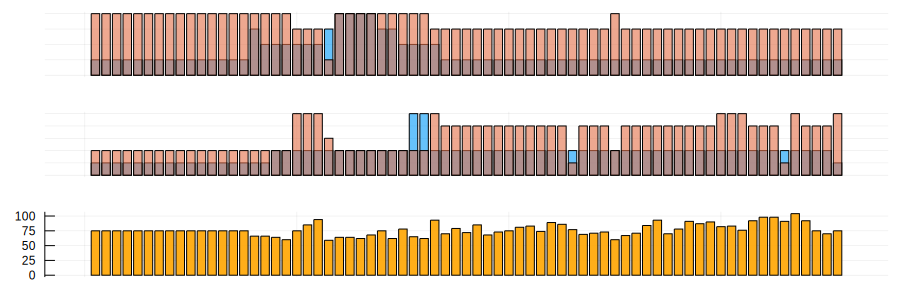

In [106]:
c_med = get_meds(cli5300)
a_med = get_meds(ai5300)
c_flu = get_fluid(cli5300)
a_flu = get_fluid(ai5300)
map = map5300;
draw_trajectory(c_med, a_med, c_flu, a_flu, map)

# Policy Iterator on Discrete Space

In [ ]:
AI Pressor for expired: 3197,1664,2265,2083,4054
AI Fluid for expired: 3029,1505,3160,3631,1938
Physician Pressor for expired: 6387,1806,1131,541,3398
Clinician Fluid for expired: 4110,4753,1328,905,2167
                
                
AI Pressor for survived: 3934,2684,2543,3592,7153
AI Fluid for survived: 4717,2818,4193,4545,3633
Physician Pressor for survived: 11553,3346,1520,700,2787
Clinician Fluid for survived: 6841,6620,1350,1404,3691


In [108]:
pi_distr_deceased = (
      # Physisian
      [[6387.0, 1806.0, 1131.0, 541.0, 3398.0], 
       [4110.0, 4753.0, 1328.0, 905.0, 2167.0]], 
      # AI 
      [[3197, 1664, 2265, 2083, 4054], 
       [3029, 1505, 3160, 3631, 1938]])

([[6387.0, 1806.0, 1131.0, 541.0, 3398.0], [4110.0, 4753.0, 1328.0, 905.0, 2167.0]], [[3197, 1664, 2265, 2083, 4054], [3029, 1505, 3160, 3631, 1938]])

In [113]:
pi_distr_survived = (
       # Physisian
       [[11553.0, 3346.0, 1520.0, 700.0, 2787.0], 
        [6841.0, 6620.0, 1350.0, 1404.0, 3691.0]], 
       # AI
       [[3934,2684,2543,3592,7153], 
        [4717,2818,4193,4545,3633]])

([[11553.0, 3346.0, 1520.0, 700.0, 2787.0], [6841.0, 6620.0, 1350.0, 1404.0, 3691.0]], [[3934, 2684, 2543, 3592, 7153], [4717, 2818, 4193, 4545, 3633]])

In [123]:
function plot_pi_summary(deceased, survived)
    dcli = deceased[1]
    dai  = deceased[2]
    scli = survived[1]
    sai  = survived[2]

    ctg         = repeat(["Ph", "AI"], inner = 5)
    nam_pressor = repeat(["$(v[1])+" for v in a2pressor], outer = 2)
    nam_fluid   = repeat(["$(v[1])+" for v in a2fluid], outer = 2)

    plot(layout=(2,2), size = (800, 300))

    category_groupbar([dcli[1] dai[1]], ctg, nam_pressor, xlabel = "deseased: pressor (AI is red)", subplot = 1)
    category_groupbar([dcli[2] dai[2]], ctg, nam_fluid, xlabel = "deseased: fluid (AI is red)", subplot = 2)

    category_groupbar([scli[1] sai[1]], ctg, nam_pressor, xlabel = "survived: pressor (AI is red)", subplot = 3)
    category_groupbar([scli[2] sai[2]], ctg, nam_fluid, xlabel = "survived: fluid (AI is red)", subplot = 4)
end

plot_pi_summary (generic function with 1 method)

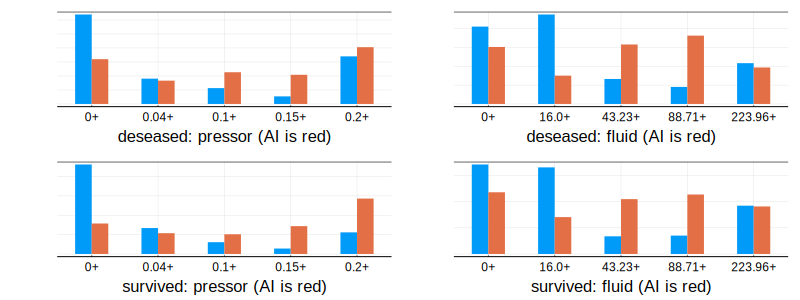

In [124]:
plot_pi_summary(pi_distr_deceased, pi_distr_survived)


In [126]:
pi_5044 = [8,24,24,8,25,16,1,1,1,25,16,25,4,4,4,23,25,25,4,4,3,3]
pi_5200 = [9,9,8,8,22,2,2,2,2,24,24,24,3,14,14,18,18,24,18,9,8,16,25,3,23,23,9,8,8,8,8,23,14,8,8,8,3,3,8,3,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,9,9,17,17,9,25,9,9,9,9,9,9,9,1];

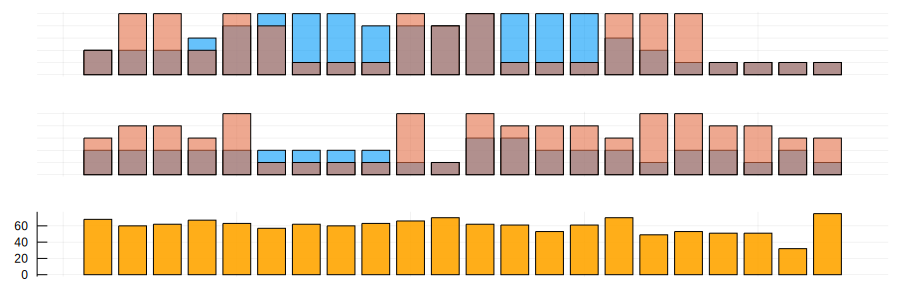

In [128]:
c_med = get_meds(cli5044)
a_med = get_meds(pi_5044)
c_flu = get_fluid(cli5044)
a_flu = get_fluid(pi_5044)
map = map5044;
draw_trajectory(c_med, a_med, c_flu, a_flu, map)

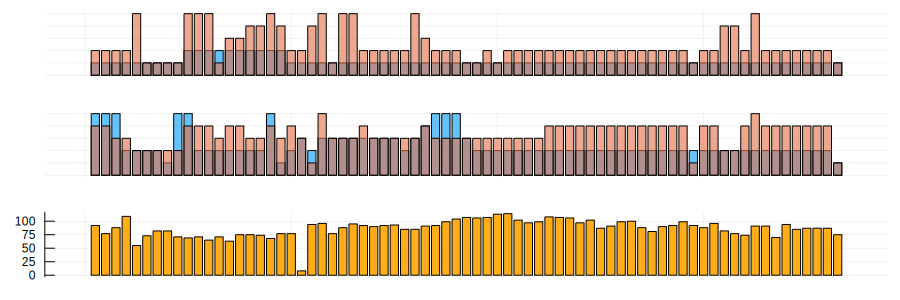

In [130]:
c_med = get_meds(cli5200)
a_med = get_meds(pi_5200)
c_flu = get_fluid(cli5200)
a_flu = get_fluid(pi_5200)
map = map5200;
draw_trajectory(c_med, a_med, c_flu, a_flu, map)